<a href="https://colab.research.google.com/github/SachinSharma6174/neural_network/blob/main/MultilayerPerceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#1. Load datasets
from sklearn.datasets import load_digits
# from sklearn.datasets import load_breast_cancer
# cancer = load_digits()
digit_data = load_digits()
X = digit_data.data
y = digit_data.target
# print(y)
# print(y)
print(X)
# data = datasets.load_covt
# print(datasets.fetch_covtype)



[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


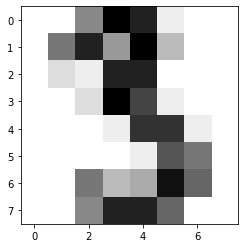

In [19]:
import numpy as np
import matplotlib.pyplot as plt
# print(np.unique(X))
digits = load_digits()
print(np.unique(X))
print(np.unique(y))
# print(digits.DESCR)
# print(digits.data.shape)
plt.gray()
# plt.matshow(digits.images[1])
plt.imshow(digits.images[3], cmap = plt.cm.gray_r, interpolation="nearest")
plt.show()

In [20]:
# Creating train and test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1)

In [23]:
# Standardizing the value
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
standard_scaler.fit(X_train)
X_train_std = standard_scaler.transform(X_train)
X_test_std =standard_scaler.transform(X_test)

In [ ]:
# Training Neural Network using Multi-layer Perceptron classifier
from sklearn.neural_network import MLPClassifier

perceptron = MLPClassifier(max_iter = 20, random_state = 1, verbose = True)
perceptron.fit(X_train_std, y_train)

print("activation func {}".format(perceptron.activation))
print("Predicted Classes {}".format(perceptron.classes_))
print("Training set loss Loss {}".format(perceptron.loss_))

In [ ]:
# Second MLP
